### TASK - 2 : Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
titanic_data = pd.read_csv('E:/prodigy/Task-2/Titanic_dataset.csv')

## Exploring the Data

In [3]:
df = pd.DataFrame(titanic_data)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


⚫as we can see the column has the correct data types , but it may contain cells with different/blank values. will fix it out later on ...

In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


⚫ only numeric column will have statistical measures...

## Handling Missing Data

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

⚫ Filling missing values of age column with the median and removing Cabin column due to excess missing values

In [8]:
df['Age'].fillna(df['Age'].median(),inplace = True)
df.drop('Cabin',axis = 1,inplace = True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

⚫Removing rows with missing values in specific embarked col.

In [10]:
df.dropna(subset = ['Embarked'],inplace = True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Performing EDA and Data Visualization

⚫ lets check out survival ratio . 0 means dead , 1 means alive.

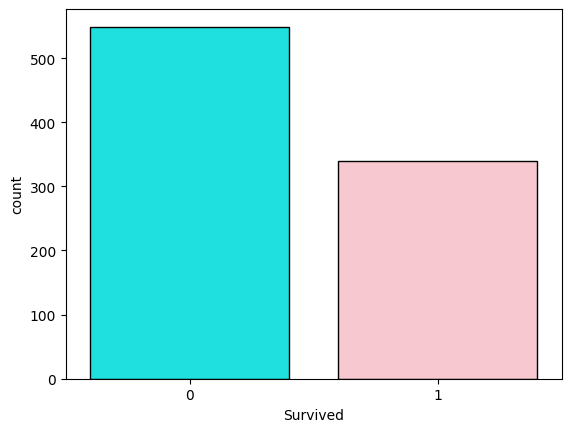

In [12]:
sns.countplot(x='Survived', palette=['cyan', 'pink'], edgecolor='black', data=df)
plt.show()

⚫lets see the male female survival ratio.

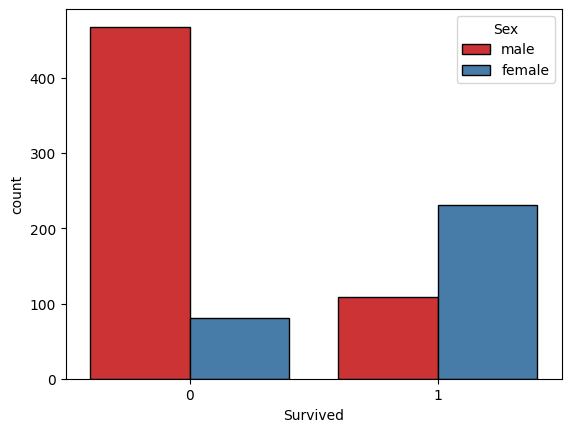

In [13]:
sns.countplot(x = 'Survived', hue = 'Sex', palette = 'Set1', edgecolor = 'black', data = df )
plt.show()

⚫Checking the exact count of males and females survived !

In [14]:
df.groupby(['Sex']).Survived.sum()

Sex
female    231
male      109
Name: Survived, dtype: int64

⚫ almost double the amount of women survived😒!

<AxesSubplot: xlabel='Survived', ylabel='count'>

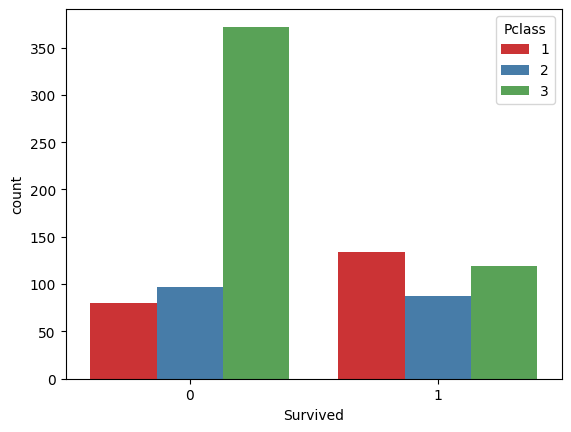

In [15]:
sns.countplot(x = 'Survived', hue = 'Pclass',palette = 'Set1', data = df)

⚫ so choosing first class for travelling was beneficial !

<AxesSubplot: xlabel='SibSp', ylabel='count'>

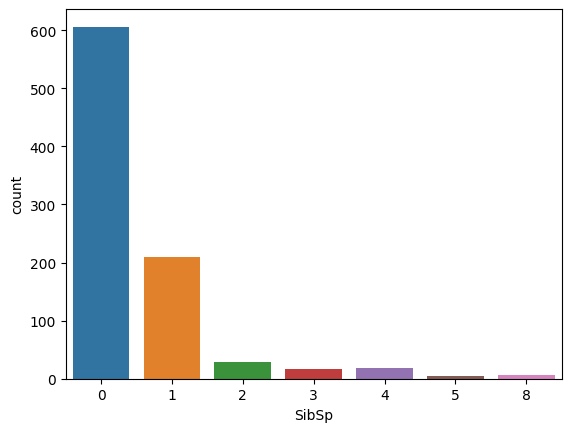

In [16]:
sns.countplot(x = 'SibSp', data = df)

⚫ which person has 8 siblings 😶🙆‍♀️🙄 and that too on board!

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

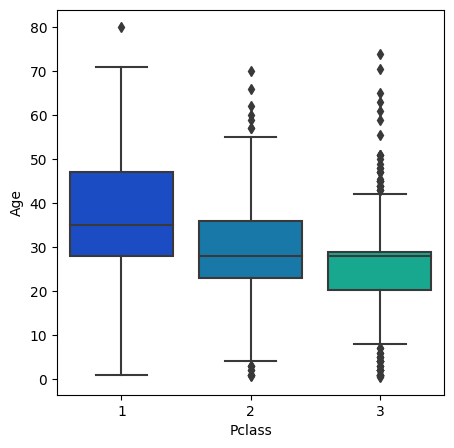

In [17]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'Pclass', y = 'Age', palette = 'winter', data = df)

⚫ amm there can be multiple conclusion from this graph .but all class has almost all ages .
⚫ 3rd class has teenagers , may be they dont have that amount of money...

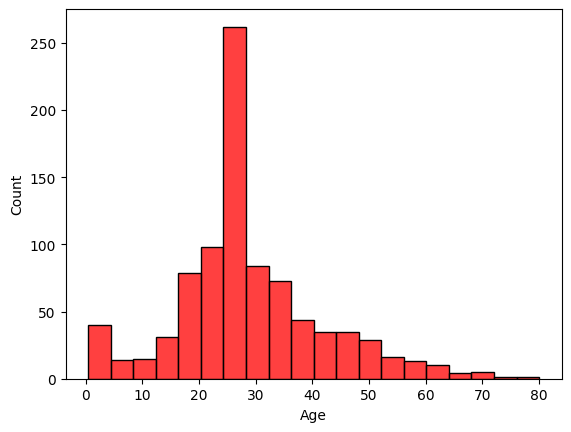

In [18]:
sns.histplot(df['Age'],bins = 20,color = 'red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

⚫people between age 25-28 were most and 72-80 were least

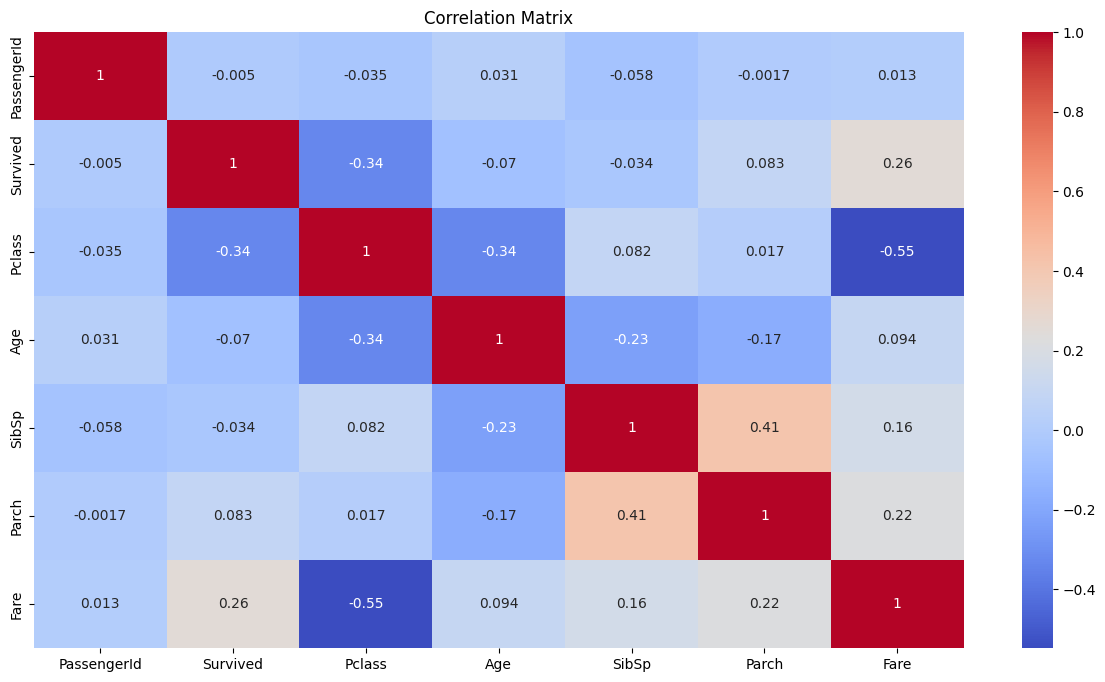

In [19]:
correlation = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

⚫ correlation shows the dependency between two columns/attributes.
⚫ it has value between (-1 to 1) i.e, -1 shows no dependency and 1 shows fully dependency.
⚫ understanding this matrix is an art, and not everyone is an artist 😎...

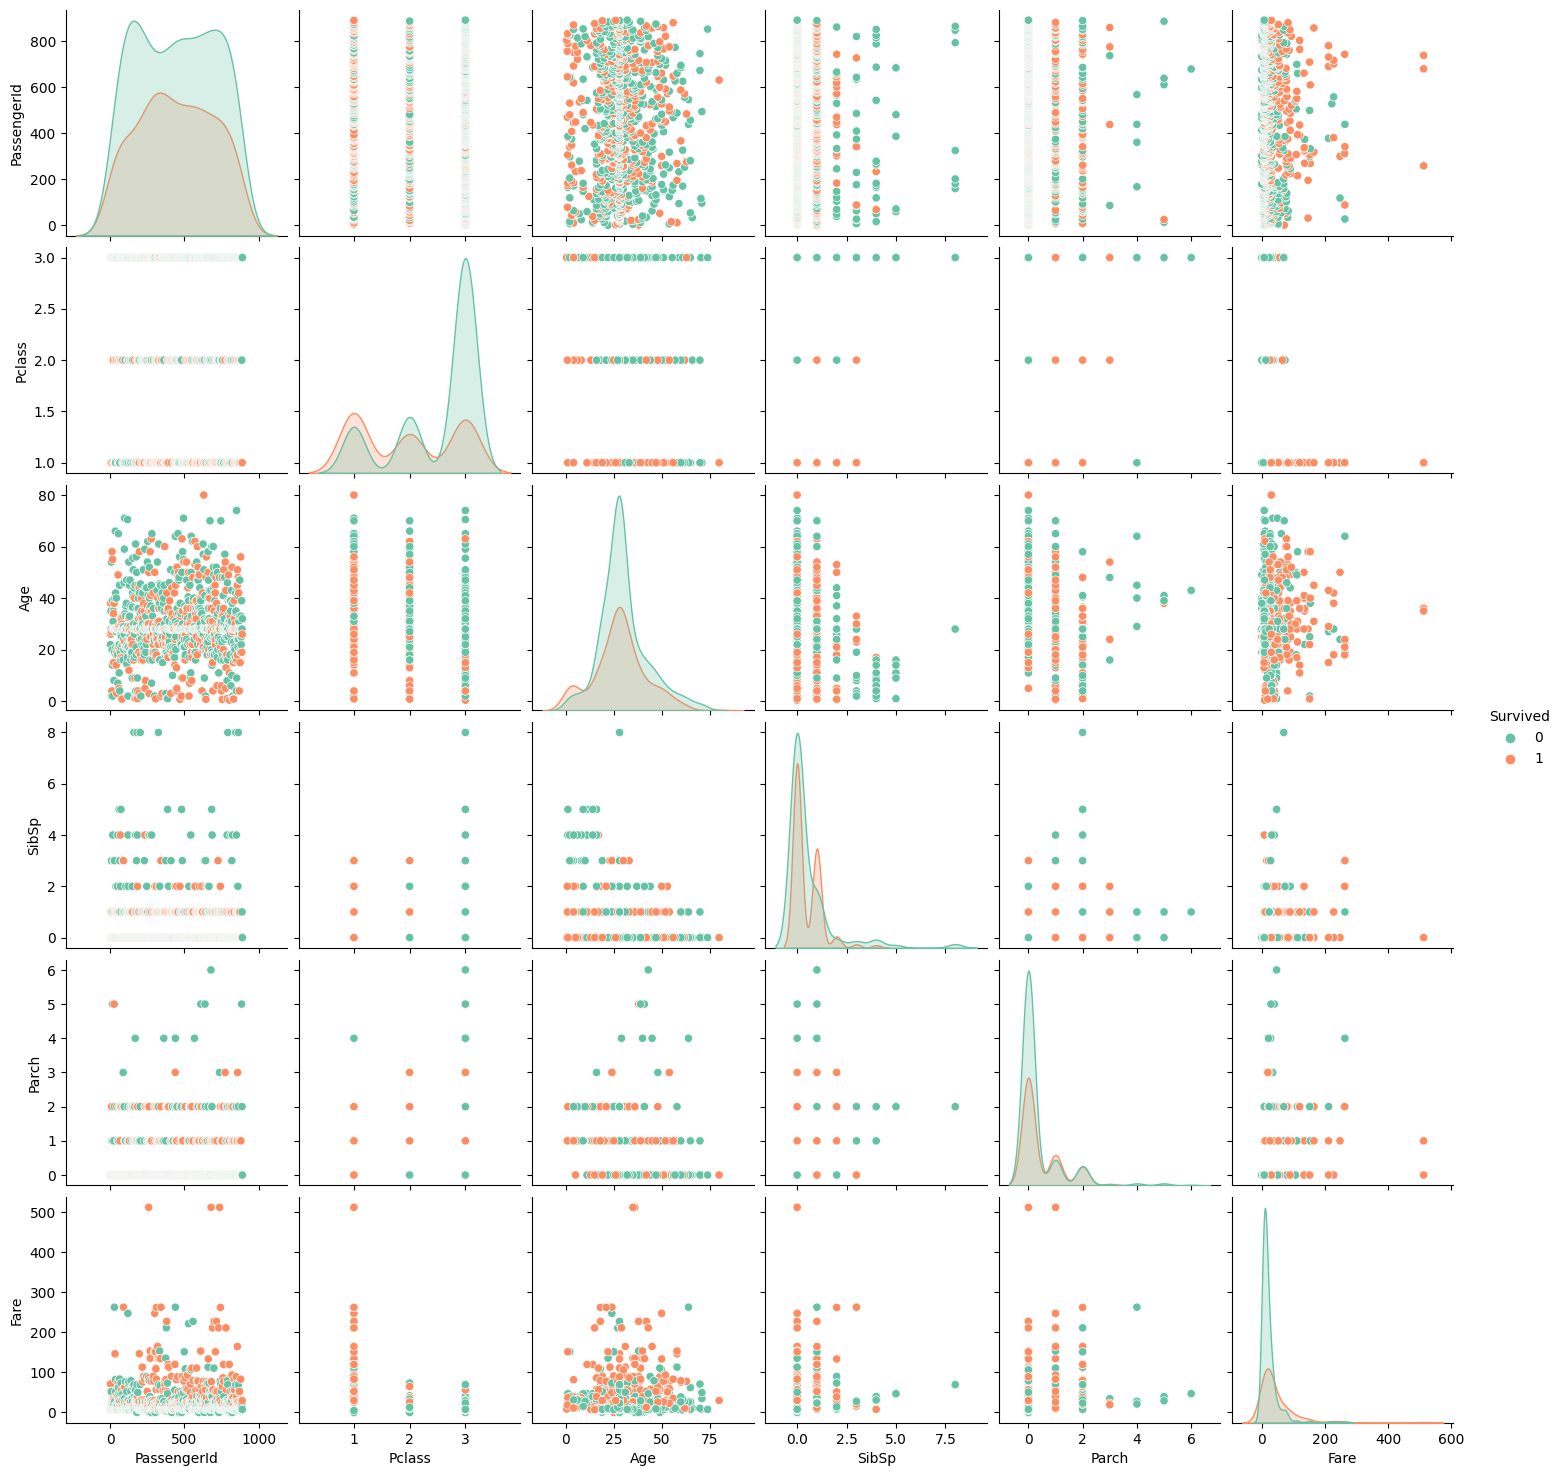

In [20]:
#Plottng Pairplot
sns.pairplot(df,hue = 'Survived', palette = 'Set2')
plt.show()

In [21]:
embark = pd.get_dummies(df['Embarked'],drop_first = True)
sex = pd.get_dummies(df['Sex'],drop_first = True)

⚫ As we have object type embark and sex column. we need to convert to numberic which can be usefull in model creation.
⚫ as embark has 3 unique values, 3 column will generate and 1 will be placed for that values and rest 0.
⚫ we removed the first column , because we can find that value if all columns has zeros.

In [22]:
df.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [23]:
df = pd.concat([df,sex,embark],axis = 1)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


⚫NOTE - There is no sense of creating a model for this because we can't use this data in future and also no sense of predicting someone's life .
  Its all was based on luck and written in their destiny.

# END